# 영화 시청기록 저장

<br><hr>

## 00. 기본 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 출력 X
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

#matplotlib 패키지 한글 깨짐 처리 시작
#------------------------------------------------------------------------------------
# 운영체제별 한글 폰트 설정

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
    
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [4]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<br><hr>

# 01. 데이터 불러오기

In [5]:
movies = pd.read_csv('../data/movies_시청기록병합.csv', encoding='utf8')
print(movies.shape)  # 1533만 4920개

(15334920, 9)


In [6]:
movies.columns

Index(['sha2_hash', 'asset', 'asset_nm', 'CT_CL', 'genre_of_ct_cl', 'use_tms',
       'disp_rtm', 'strt_dt', 'category'],
      dtype='object')

In [73]:
movies.isnull().sum()

sha2_hash             0
asset                 0
asset_nm              0
CT_CL                 0
genre_of_ct_cl        0
use_tms               0
disp_rtm              0
strt_dt               0
category          21695
dtype: int64

In [75]:
movies.asset_nm # 카테고리 나중에 삭제

0                 (FREE)10일간의 애인(무료)
1                            협녀-칼의기억
2                    남편 동료와 섹파된 가정주부
3                             (더빙)코코
4                     (FREE)큐리오사(무료)
                      ...           
15334915                      나이트 와치
15334916               (할인)물 좋은 하숙집2
15334917                 속살을 마주한 그날밤
15334918    (FREE)완전한 사육: 욕망의 시작(무료)
15334919                    만지지 마세요!
Name: asset_nm, Length: 15334920, dtype: object

<br>

## *시청시간 3분 이하 제거*

In [29]:
movies_filtered.head(1)

,sha2_hash,asset,asset_nm,CT_CL,genre_of_ct_cl,use_tms,disp_rtm,strt_dt,category
0,733a667aac4bca13886a96b5463237d2b667a80a2d48da...,cjc|M5147122LFON18980301,(FREE)10일간의 애인(무료),영화,멜로,1301.0,01:28,2.023112e+13,프리미엄 무료관/무료영화/무료 영화관


In [32]:
# 3분 이하 시청 => 463만 5186개
(movies_filtered['use_tms'] <= 180).sum()

4635186

In [36]:
movies_filtered_180 = movies_filtered[movies_filtered['use_tms'] > 180]
movies_filtered_180.shape # 725만 2752개

(7252752, 9)

<br><hr>

## 03. 사용자 확인

In [38]:
# subsr => 48만 7198명
subsr_value_counts = movies_filtered_180['sha2_hash'].value_counts()
subsr_value_counts

sha2_hash
a28888712ae000684144a81fd063fd492e6191aa5179ab52b8889f857d9d655b    4170
f86007dc2cc79681797a0e54481eeaab58d2d4884fb0f5efbc91aebd97ae6cb3    2936
ad2229ee646489ac55321e9cd35a67ee9c541292dd1448d8905d62f05f37b751    2916
e6589bc0cc1175a26ee466958416cd7179cba66f18e160fa2cb18194f385b6da    2838
794ba87ea04c9ab5cd652b215128ddc36528215f3d589c7acb67b54a009a2245    2537
                                                                    ... 
294553a831421501dda039d310cf4650b1b145b9eb1dc5b92148932bf444b2ff       1
626affb5d44fe64a070be05e0e8300a9a7521a741d1c647336ce240a926ebf36       1
e0cf302d9951743a161f6a757d1d4d0aa1e18af92b9a918f0ccbf5171775851e       1
0dedcf4ee4f3d79958c26289ce87f01efed2263ee8dd3e067c26160e1f86c4b7       1
28fa6ffa120e5c6e50839fb74fcafc009a7b10981de3ea0dde6bdd26915f9271       1
Name: count, Length: 487198, dtype: int64

In [41]:
subsr_value_counts.describe()

count    487198.000000
mean         14.886662
std          38.460296
min           1.000000
25%           2.000000
50%           4.000000
75%          14.000000
max        4170.000000
Name: count, dtype: float64

In [39]:
# VOD (영화)를 한 번만 시청한 사용자 => 11만 1803명
(subsr_value_counts == 1).sum()

111803

In [42]:
# 데이터프레임으로 변환
counts_df = subsr_value_counts.reset_index()
counts_df.columns = ['subsr', 'count']
counts_df.head(3)

,subsr,count
0,a28888712ae000684144a81fd063fd492e6191aa5179ab...,4170
1,f86007dc2cc79681797a0e54481eeaab58d2d4884fb0f5...,2936
2,ad2229ee646489ac55321e9cd35a67ee9c541292dd1448...,2916


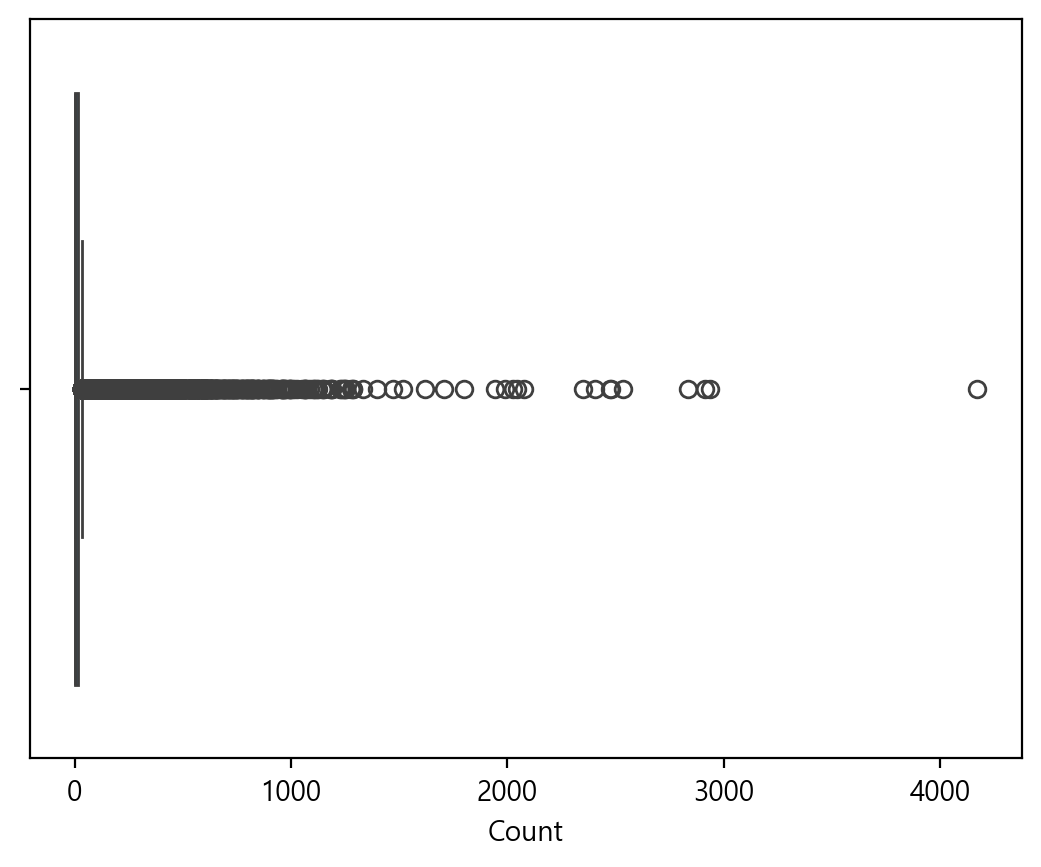

In [43]:
# 박스그래프
sns.boxplot(data=counts_df, x='count', orient='h')
plt.xlabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

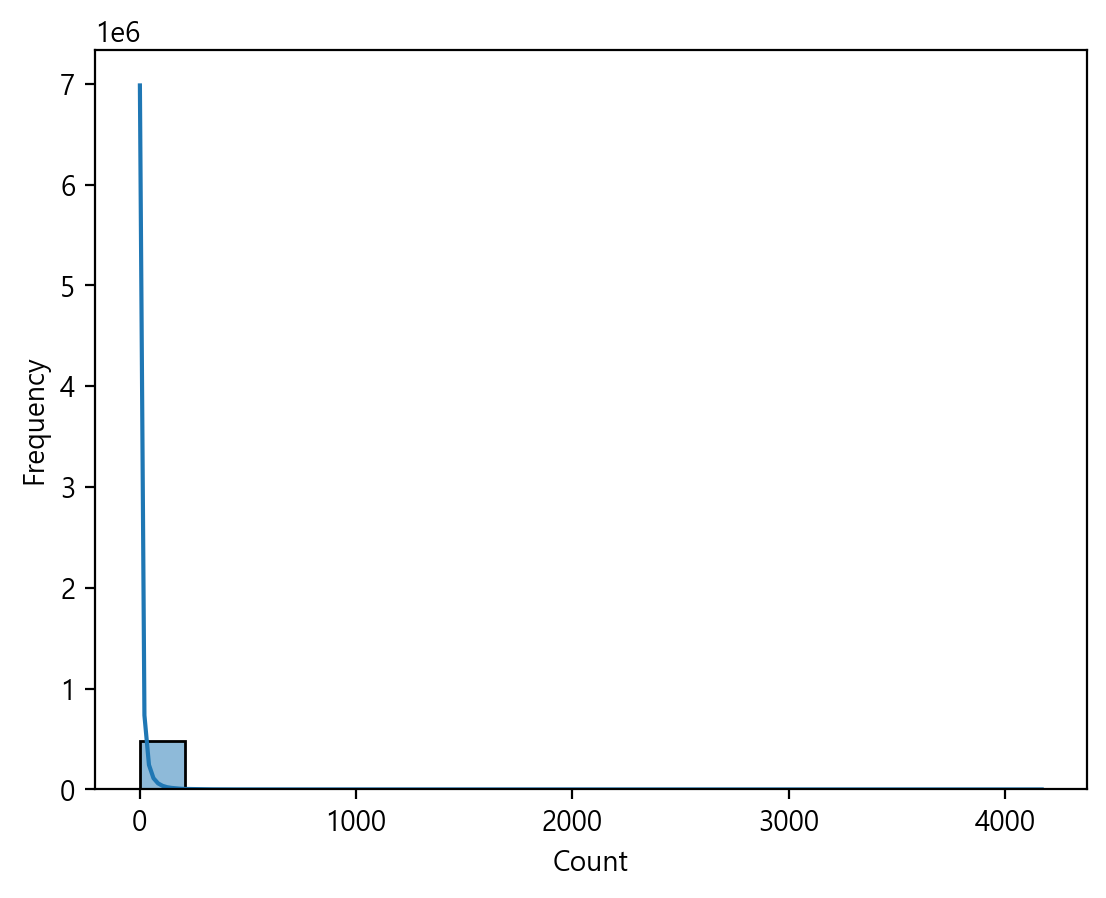

In [44]:
sns.histplot(counts_df['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')

## *1000번 이상 시청한 사람 제거*

In [48]:
threshold = 1000
counts_1000_remvd = counts_df[counts_df['count'] <= threshold]
counts_1000_remvd.head(3)

,subsr,count
52,6f41099e92b5ec5b15e10d2bb8b54e81b5915a36dab953...,996
53,4f58d444638b8eb446074f1c84cde6384198ace2c75aef...,996
54,2f40b73b1b43c4bc38c5c371d6f089d6c03ea44cbeed08...,995


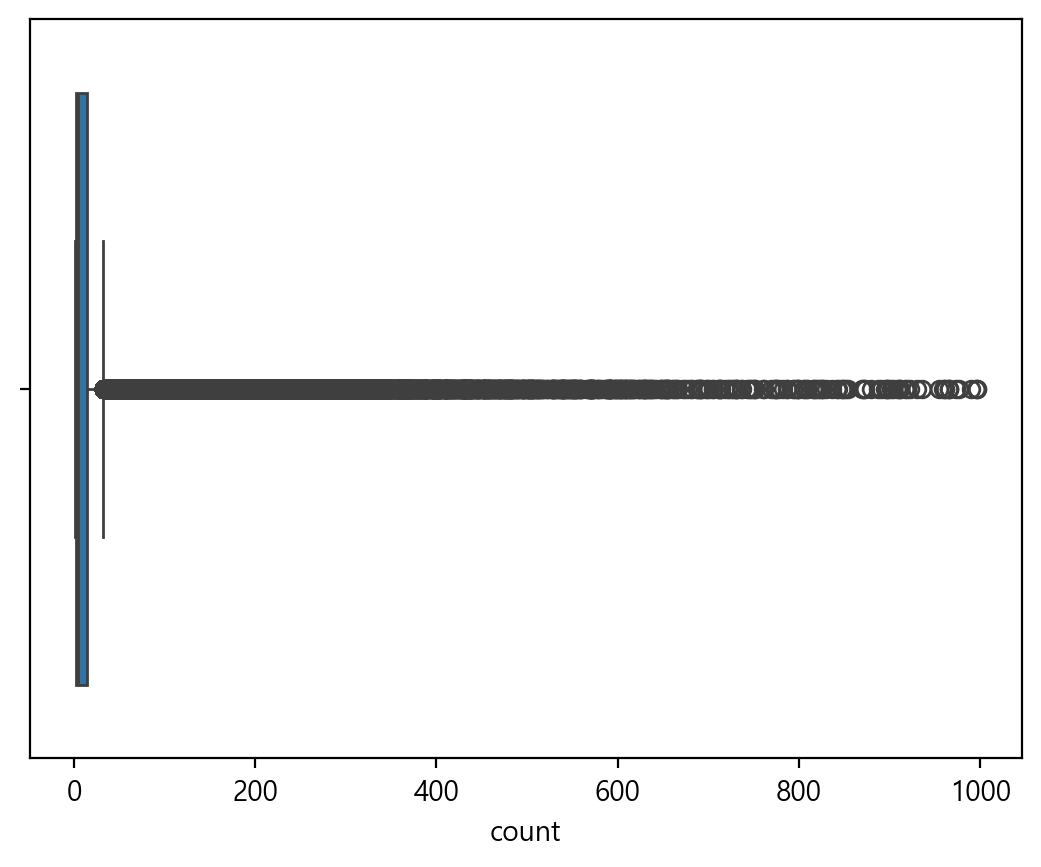

In [49]:
# 다시 시각화
sns.boxplot(data=counts_1000_remvd, x='count', orient='h')
plt.xlabel('count')
plt.show()

Text(0, 0.5, 'Frequency')

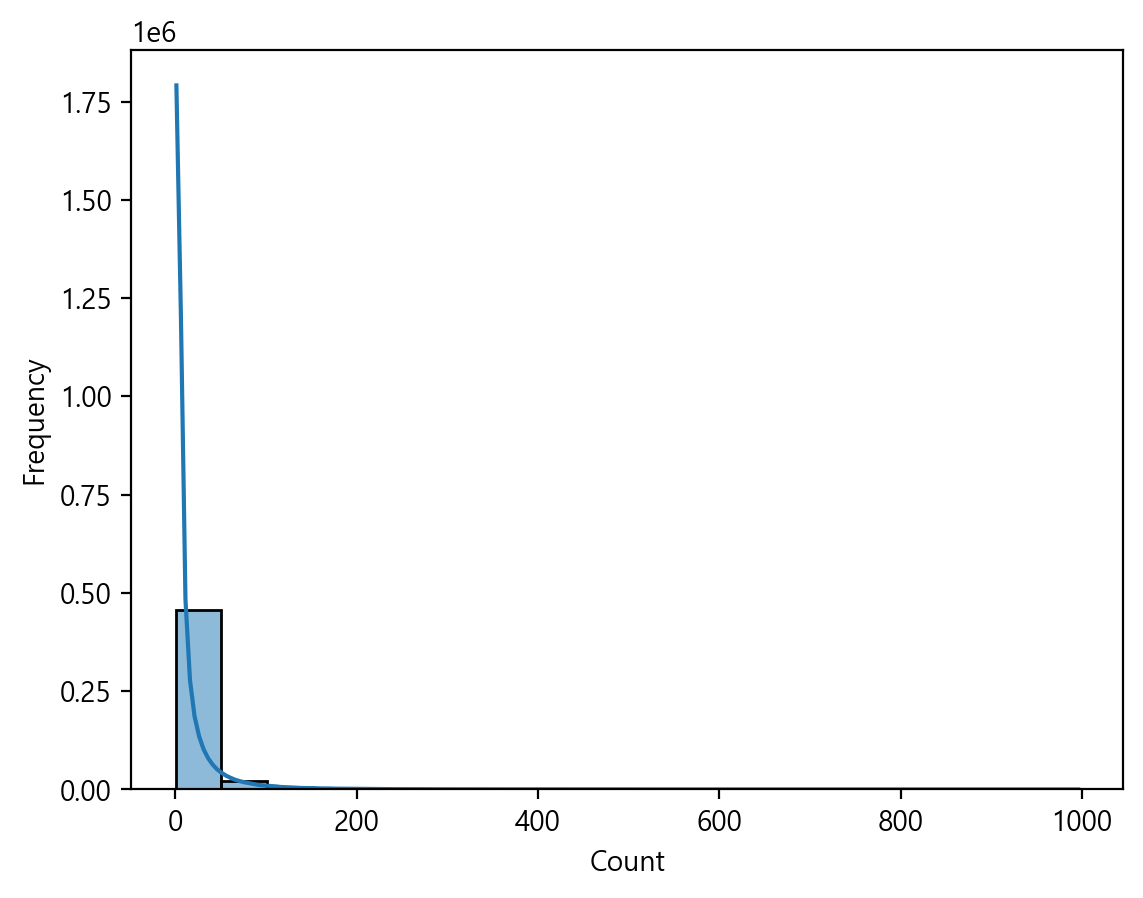

In [50]:
sns.histplot(counts_1000_remvd['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')

## *한 번만 시청한 사람 제거*

In [64]:
counts_1_remvd = counts_1000_remvd[counts_1000_remvd['count'] > 1]
print(counts_1_remvd.shape)  # (375343, 2)
counts_1_remvd.head(3)

(375343, 2)


,subsr,count
52,6f41099e92b5ec5b15e10d2bb8b54e81b5915a36dab953...,996
53,4f58d444638b8eb446074f1c84cde6384198ace2c75aef...,996
54,2f40b73b1b43c4bc38c5c371d6f089d6c03ea44cbeed08...,995


Text(0, 0.5, 'Frequency')

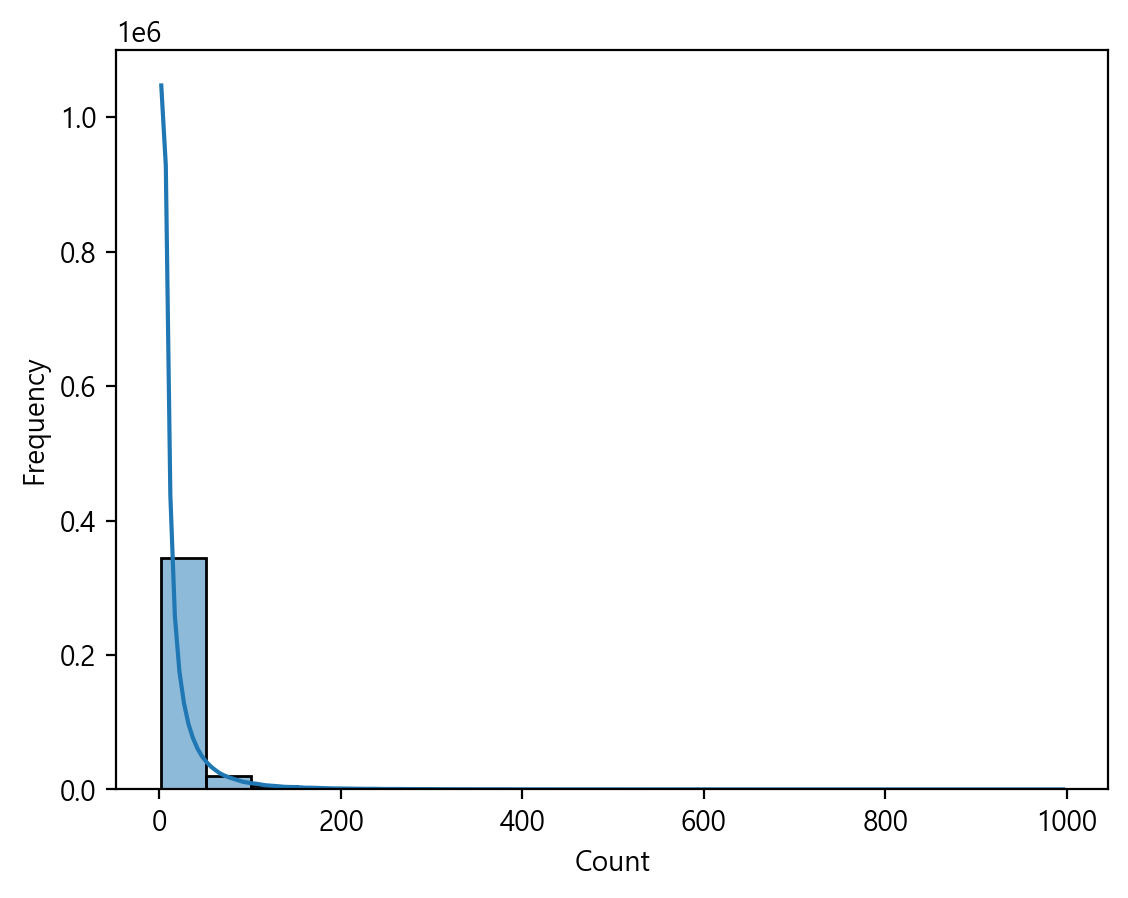

In [67]:
sns.histplot(counts_1_remvd['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')

## *이상치라 생각되는 것 일단 제거*

In [68]:
counts_1_remvd.describe()

,count
count,375343.000000
mean,18.807712
std,38.098798
min,2.000000
25%,3.000000
50%,7.000000
75%,19.000000
max,996.000000


In [69]:
Q1 = 3
Q3 = 19
IQR = Q3 - Q1

# 이상치 범위 계산
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [70]:
remv_outlier = counts_1_remvd[
    (counts_1_remvd['count'] >= lower) & (counts_1_remvd['count'] <= upper)
]
remv_outlier.describe() # 33만 6982명

,count
count,336982.000000
mean,9.914530
std,9.569147
min,2.000000
25%,3.000000
50%,6.000000
75%,13.000000
max,43.000000


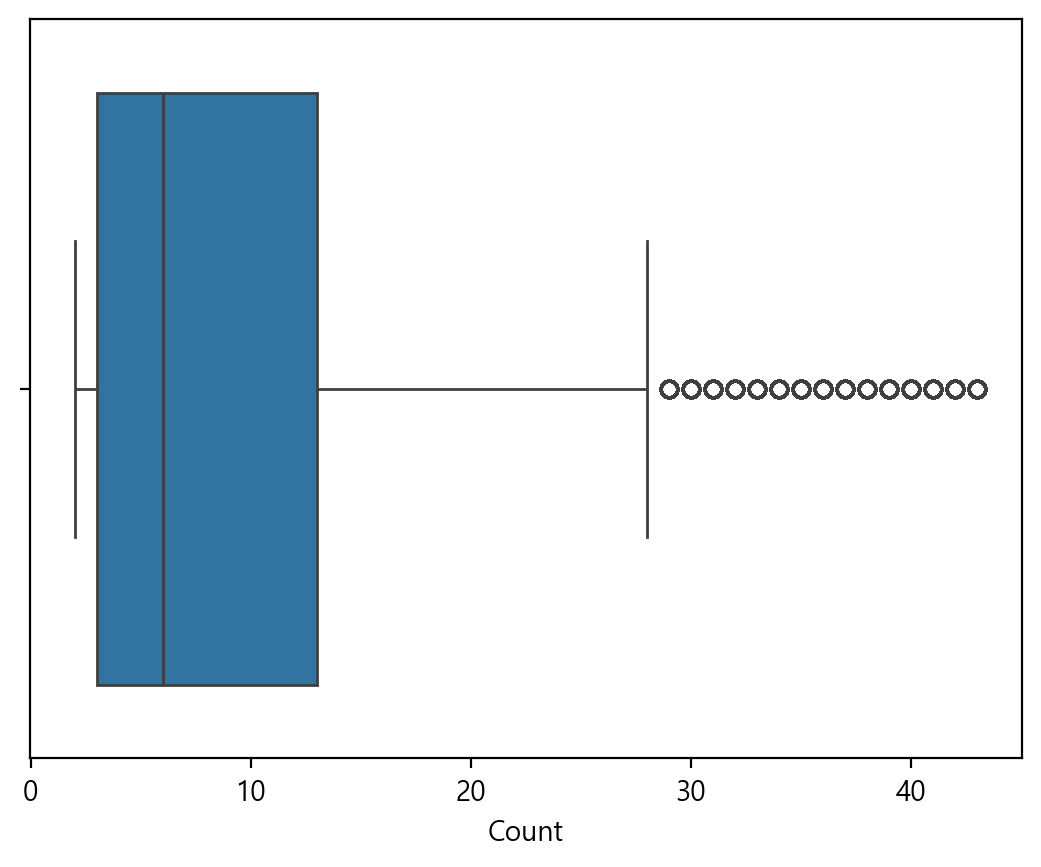

In [71]:
# 다시 시각화
sns.boxplot(data=remv_outlier, x='count', orient='h')
plt.xlabel('Count')
plt.show()

Text(0, 0.5, 'Frequency')

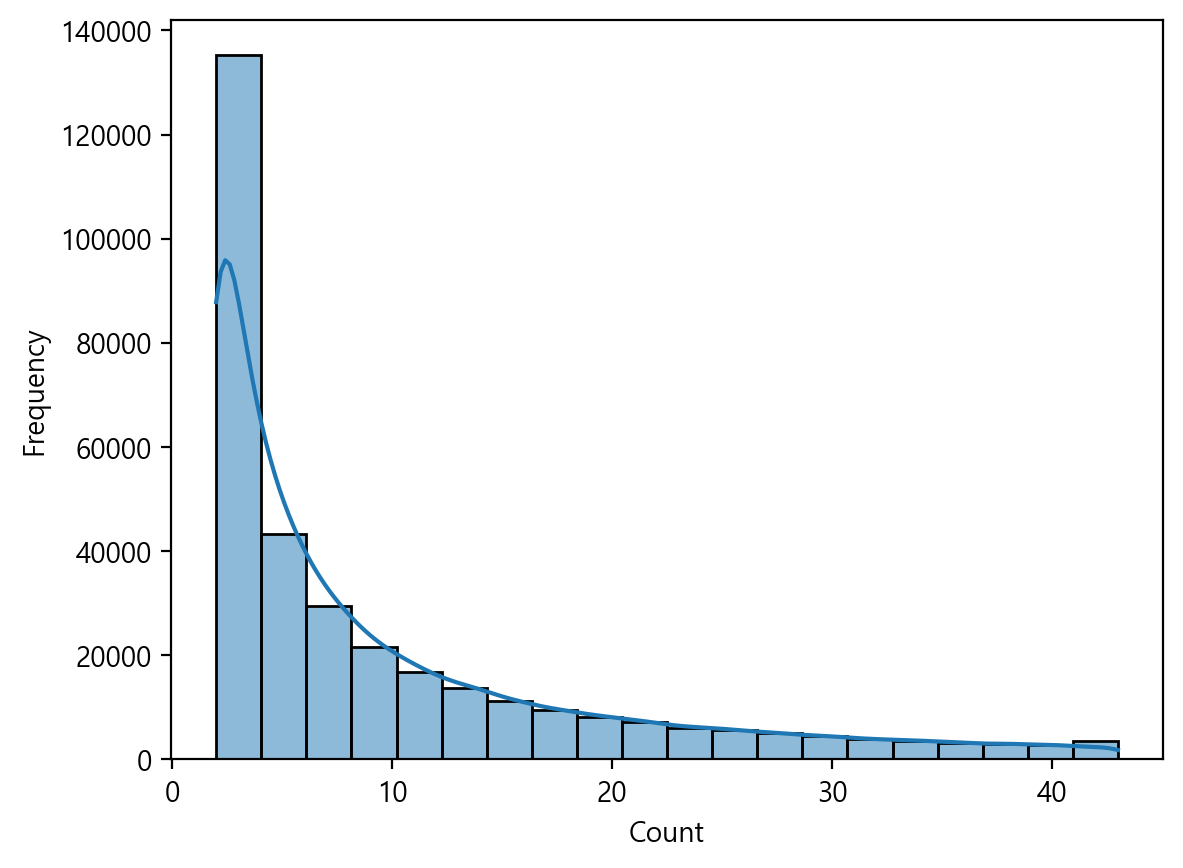

In [72]:
sns.histplot(remv_outlier['count'], bins=20, kde=True)
plt.xlabel('Count')
plt.ylabel('Frequency')